In [3]:
import tensorflow as tf

In [4]:
dir(tf.keras.optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'experimental',
 'get',
 'legacy',
 'schedules',
 'serialize']

# SGD

- SGD (short for Stochastic Gradient Descent) is a widely used optimization algorithm in machine learning, particularly for training deep neural networks. 
- It is a type of gradient descent optimization algorithm that updates the weights of the neural network by iteratively computing the gradients of the loss function with respect to the weights and then adjusting the weights in the direction that minimizes the loss.


- In TensorFlow, SGD can be implemented using the 
        tf.keras.optimizers.SGD() class.
        
- This class takes several hyperparameters that control how the optimization algorithm behaves, including:

- learning_rate: The learning rate controls the step size taken in the direction of the negative gradient. A higher learning rate may cause the optimization to converge more quickly, but it can also cause instability and overshooting. A lower learning rate may take longer to converge, but it can also provide more stable results.

- momentum: The momentum hyperparameter controls how much the optimization algorithm relies on previous weight updates when updating the current weights. A higher momentum can help prevent the optimization from getting stuck in local minima, but it can also cause overshooting.

- nesterov: A boolean value indicating whether or not to use Nesterov momentum. Nesterov momentum is a modification of standard momentum that reduces the oscillations that can occur when the momentum term is high.

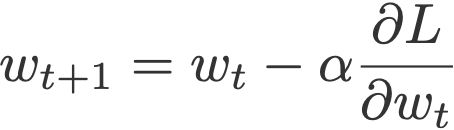

- Here's an example of how you might use the tf.keras.optimizers.SGD() class in TensorFlow:

In [5]:
import tensorflow as tf

# Define a neural network model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Define the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, 
                                    momentum=0.9, 
                                    nesterov=True)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# AdaGrad — Adaptive Gradient Algorithm

- Decay the learning rate for parameters in proportion to their update history (more updates means more decay).

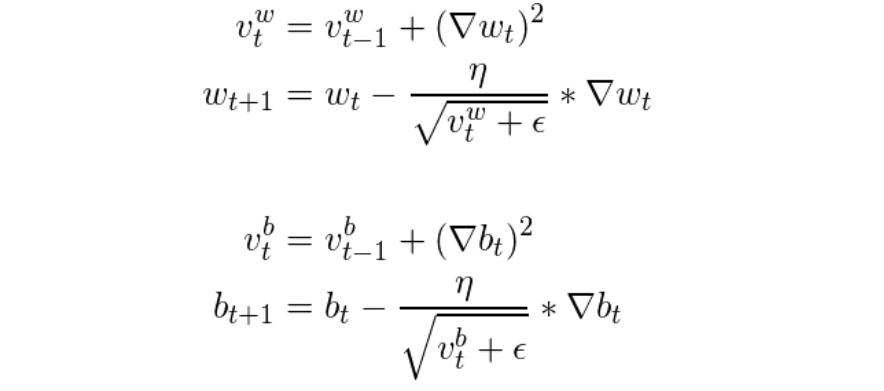

In [12]:
def adagrad():
    w, b, eta = init_w, init_b, 0.1
    v_w, v_b, eps = 0, 0, 1e-8
    for i in range(max_epochs):
        dw, db = 0, 0
        for x,y in zip(X,Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
            
        v_w = v_w + dw**2
        v_b = v_b + db**2
        
        w = w - (eta/np.sqrt(v_w + eps)) * dw
        b = b - (eta/np.sqrt(v_b + eps)) * db

**Which option is true about Optimizers which have adaptive learning rates while training?**


1. The training should start from larger learning rate
2. **The training should start from smaller learning rate**
3. When we start with larger learning rate, at some point the value of the loss function starts decreasing in the first few iterations
4. When we start with smaller learning rate, the loss doesn’t improve and probably even grows while we run the first few iterations


- The training should start from a relatively large learning rate because, in the beginning, random weights are far from optimal, and then the learning rate can decrease during training to allow more fine-grained weight updates.
- The two other statements about learning rates are incorrect, the correct statements are: When we start with a smaller learning rate, at some point the value of the loss function starts decreasing in the first few iterations.
- When we start with a larger learning rate, the loss doesn’t improve and probably even grows while we run the first few iterations.

# RMSprop : 

- MSprop (short for Root Mean Square Propagation) is an optimization algorithm used in machine learning to improve the performance of deep neural networks by adapting the learning rate for each weight in the network.
- It is a popular optimization algorithm used for gradient descent in neural networks.




    - In Tensor Flow, RMSprop can be implemented using the tf.keras.optimizers.RMSprop() class. 
    
    

- When using this class, you can specify various hyperparameters to control how the optimization algorithm behaves. 



- **The most important of these hyperparameters are:**

    - learning_rate: The learning rate controls how quickly the optimization algorithm adapts the weights. A higher learning rate may cause the optimization to converge more quickly, but it can also cause instability and overshooting. A lower learning rate may take longer to converge, but it can also provide more stable results.

    - decay: The decay hyperparameter controls the rate at which the learning rate decreases over time. This helps prevent the algorithm from getting stuck in local minima or overshooting the optimal solution.

    - momentum: The momentum hyperparameter controls how much the optimization algorithm relies on previous weight updates when updating the current weights. A higher momentum can help prevent the optimization from getting stuck in local minima, but it can also cause overshooting.

    - epsilon: A small value added to the denominator for numerical stability.

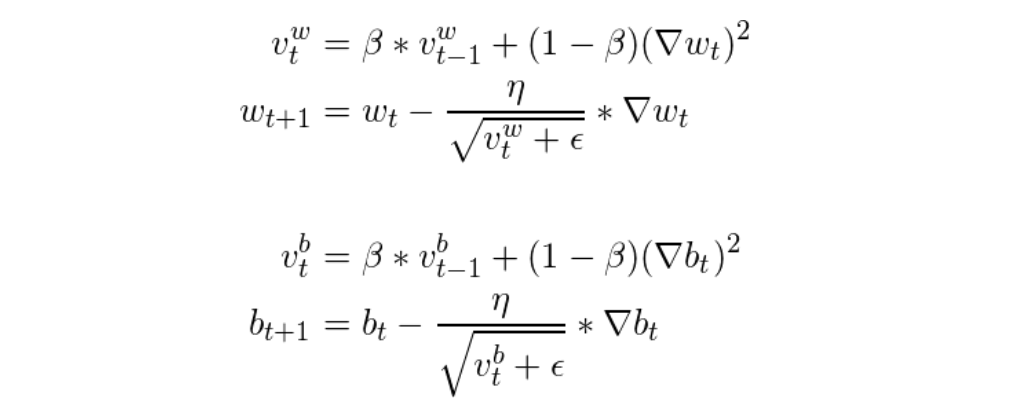


- Here's an example of how you might use the tf.keras.optimizers.RMSprop() class in Tensor Flow:

In [11]:
def rmsprop():
    w, b, eta = init_w, init_b, 0.1
    v_w, v_b, beta, eps = 0, 0, 0.9, 1e-8
    for i in range(max_epochs):
        dw, db = 0, 0
        for x,y in zip(X,Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        v_w = beta * v_w + (1 - beta) * dw**2
        v_b = beta * v_b + (1 - beta) * db**2

        w = w - (eta/np.sqrt(v_w + eps)) * dw
        b = b - (eta/np.sqrt(v_b + eps)) * db

In [6]:
import tensorflow as tf

# Define a neural network model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Define the optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001,                                        
                                        momentum=0.6,
                                       epsilon=1e-07)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Adam

- Adam (Adaptive Moment Estimation) is a popular optimization algorithm in machine learning that combines the benefits of both SGD and RMSprop algorithms. 
- It was first introduced by Kingma and Ba in 2014. 
- The Adam algorithm adapts the learning rate of each parameter based on the gradient's moving average and the variance of the moving average. This makes it well suited for training deep neural networks, as it can handle non-stationary objective functions and noisy gradients.



- In TensorFlow, Adam can be implemented using the tf.keras.optimizers.Adam() class. This class takes several hyperparameters that control how the optimization algorithm behaves, including:
- learning_rate: The learning rate controls the step size taken in the direction of the negative gradient. A higher learning rate may cause the optimization to converge more quickly, but it can also cause instability and overshooting. A lower learning rate may take longer to converge, but it can also provide more stable results.
- beta_1: The decay rate for the first moment estimate. This controls how much weight is given to previous gradient values when computing the moving average. A value close to 1.0 will give more weight to previous gradients, while a value closer to 0.0 will give less weight.
- beta_2: The decay rate for the second moment estimate. This controls how much weight is given to previous squared gradient values when computing the moving average. A value close to 1.0 will give more weight to previous squared gradients, while a value closer to 0.0 will give less weight.
- epsilon: A small value added to the denominator to avoid division by zero.


Here's an example of how you might use the tf.keras.optimizers.Adam() class in TensorFlow:

In [14]:
import tensorflow as tf

# Define a neural network model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on mini-batches of training data
# model.fit(x_train, y_train, batch_size=32, epochs=10)


        m_t = beta_1 * m_t-1 + (1 - beta_1) * g_t
        v_t = beta_2 * v_t-1 + (1 - beta_2) * g_t^2
        m_hat_t = m_t / (1 - beta_1^t)
        v_hat_t = v_t / (1 - beta_2^t)
        w_t = w_t-1 - learning_rate * m_hat_t / (sqrt(v_hat_t) + epsilon)



    where g_t is the gradient of the loss function with respect to the weights at time t, m_t and v_t are the first and second moment estimates of the gradient at time t, m_hat_t and v_hat_t are the bias-corrected estimates of m_t and v_t, beta_1 and `beta

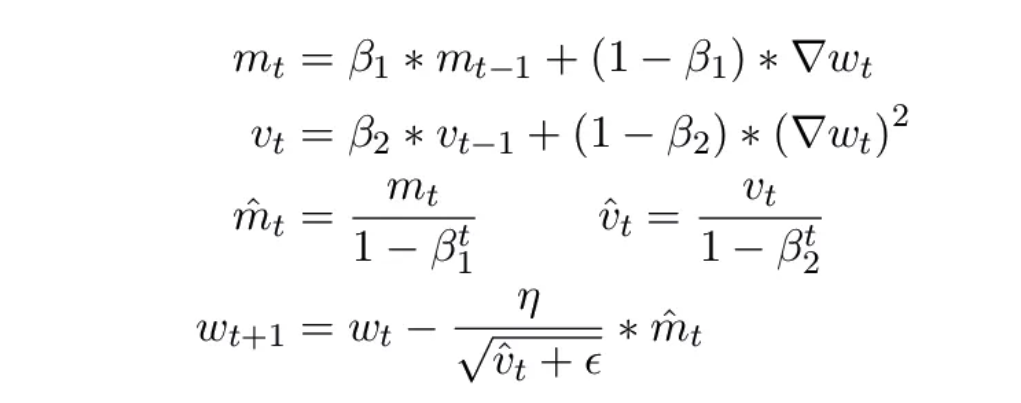

In [10]:
def adam():
	w, b, eta, max_epochs = 1, 1, 0.01, 100, 
	m_w, m_b, v_w, v_b, eps, beta1, beta2 = 0, 0, 0, 0, 1e-8, 0.9, 0.99
	for i in range(max_epochs):
		dw, db = 0, 0
		for x,y in data:
			dw += grad_w(w, b, x, y)
			db += grad_b(w, b, x, y)
		m_w = beta1 * m_w + (1-beta1) * dw
		m_b = beta1 * m_b + (1-beta1) * db
		
		v_w = beta2 * v_w + (1-beta2) * dw**2
		v_b = beta2 * v_b + (1-beta2) * db**2
		
		m_w = m_w/(1-beta1**(i+1))
		m_b = m_b/(1-beta1**(i+1))
		
		v_w = v_w/(1-beta2**(i+1))
		v_b = v_b/(1-beta2**(i+1))
			
		w = w - eta * m_w/np.sqrt(v_w + eps)
		b = b - eta * m_b/np.sqrt(v_b + eps)
	print(error(w,b))

https://towardsdatascience.com/learning-parameters-part-5-65a2f3583f7d

# Regularization : 

- L2 regularization, also known as weight decay, is a commonly used technique in neural networks to reduce overfitting. Overfitting occurs when a model is too complex and fits the training data too closely, resulting in poor generalization performance on new, unseen data. 
- L2 regularization adds a penalty term to the loss function during training that encourages the model to have smaller weights. This penalty term is proportional to the square of the L2 norm of the weights.

- The L2 regularization term is defined as:
        
        L2_reg = λ * sum(w^2)
        
- where λ is the regularization strength hyperparameter and w is a weight in the model. 
- The sum(w^2) term is the L2 norm of the weights, which is the sum of the squared weights across all layers in the model. 
- The regularization strength hyperparameter λ controls the strength of the regularization penalty.
- A higher value of λ will result in smaller weights, which reduces the model's complexity and thus reduces the risk of overfitting.
        
        
- In TensorFlow, L2 regularization can be added to a neural network model using the kernel_regularizer argument in the layer constructor. 
- For example, here's how you would add L2 regularization to a fully connected layer in TensorFlow:

In [16]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# Define a fully connected layer with L2 regularization
fc_layer = Dense(units=64, 
                 activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01))


- during training, the optimizer minimizes the loss function, which now includes the L2 regularization penalty term.
- The gradient of this penalty term with respect to the weights is simply 2 * λ * w, so the weights are updated according to the following equation:
        
        w_new = w_old - learning_rate * (dw + 2 * λ * w_old)

- where w_old is the old weight value, learning_rate is the learning rate of the optimizer, dw is the gradient of the loss function with respect to the weights, and λ is the regularization strength hyperparameter.

- L2 regularization is a useful technique to reduce overfitting in neural networks, but it should be used with care.
- Setting the regularization strength hyperparameter too high can lead to underfitting, where the model is too simple and cannot capture the complexity of the data.
- It's important to experiment with different regularization strengths to find the optimal value that balances model complexity and generalization performance.

# Dropout :

- Dropout is a regularization technique used in neural networks to prevent overfitting. 


- The idea behind dropout is to randomly drop out (i.e., set to zero) a fraction of the neurons in a layer during training, forcing the remaining neurons to learn more robust features that are not overly dependent on the presence of any single neuron.
- This helps to prevent the model from relying too heavily on any particular subset of neurons and thus improves its generalization performance on new, unseen data.

- In TensorFlow, dropout can be easily implemented using the tf.keras.layers.Dropout layer. 

- This layer randomly sets a fraction of the input units to zero during training. Here's an example of how to use the Dropout layer in a neural network:



In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

# Define a neural network with a dropout layer
model = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


- In this example, we define a neural network with a single hidden layer of 64 neurons, followed by a dropout layer with a dropout rate of 0.2 (i.e., 20% of the input units will be randomly dropped out during training), and an output layer with 10 units and a softmax activation function.

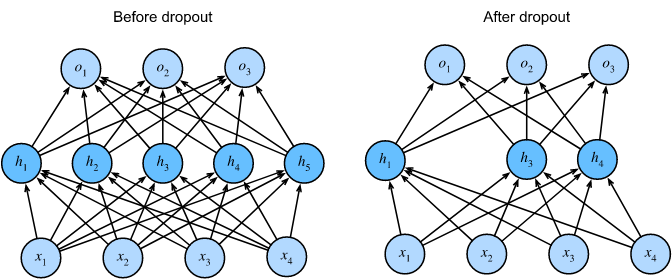

- During training, the Dropout layer randomly drops out a fraction of the neurons in the previous layer. The dropout rate specifies the fraction of input units to drop out, and typically ranges from 0.2 to 0.5.
- During inference (i.e., when making predictions on new, unseen data), the dropout layer is not used, and all neurons are used for computing the output.


- Dropout is a powerful technique for preventing overfitting in neural networks, but it can also increase training time, since each forward pass through the network involves randomly dropping out neurons. 
- It's important to experiment with different dropout rates and to use it in conjunction with other regularization techniques, such as L2 regularization, to improve the model's generalization performance.

**Which of the given options is true about model capacity? (i.e, Model capacity refers to the ability of neural networks to approximate complex functions).**

- **As number of hidden layers increases, model capacity increases**
- As dropout ratio increases, model capacity increases
- As learning rate increases, model capacity increases

The correct option is: As the number of hidden layers increases, model capacity increases.

Model capacity refers to the ability of neural networks to approximate complex functions. As the number of hidden layers increases, the model's capacity to represent complex functions also increases. This is because each additional hidden layer allows the model to learn increasingly abstract representations of the input data.

The other two options are not correct:

As dropout ratio increases, model capacity does not increase. Dropout is a regularization technique that helps prevent overfitting by randomly dropping out a fraction of the neurons in a layer during training. Increasing the dropout ratio reduces the capacity of the model to overfit the training data, but does not increase its capacity to represent complex functions.
As the learning rate increases, model capacity does not increase. The learning rate controls the step size that the optimizer takes during training, and affects the speed and stability of the learning process. It does not directly affect the capacity of the model to represent complex functions. However, choosing an appropriate learning rate is important for ensuring that the model converges to a good solution during training.


**Which of the options are correct about dropout in neural networks?**

- A. The more the dropout rate the more will be the chances for the neural network to overfit
- B. The less the dropout rate the more will be the chances for the neural network to underfit
- C. Dropout is used after training when making predictions
- D. **The value of dropout hyperparameter 0.4 implies that 40% neurons will have zero weight in the layer**

- The default interpretation of the dropout hyperparameter is the probability of a neuron to be dropped or having zero weight.

- The more the dropout rate the, more will be randomization and regularization and the lesser will be the chance for the model to overfit. Thus more dropouts will result in fewer chances of overfitting. Similarly, the fewer the dropout, the more will be the chances to overfit.

- Dropout is only used during training to make the network more robust to fluctuations in the training data. At test time, we do not apply dropout with the test data, and during inference in production.

- The number of trainable parameters in a dropout layer is always zero. 
- They are just used to enforce the output of certain neurons to zero.
- The Dropout layer is not a trainable layer. 
- It has no trainable parameters such as weight W or bias b. 
- Therefore, there is no parameters gradients to compute.

**If while training the above neural network, a dropout layer is introduced just before the second hidden layer, with a dropout rate = 0.5. Then which of the masked vectors is valid for the neurons of the second hidden layer?

**Note: The objective of a masked vector is to decide which neurons are active during calculations.

- [1,0,1,0]

Explanation:

As it is mentioned that the dropout rate is 0.5, hence we need a masked vector where the probability of 1 is 0.5. From the given options only [1,0,1,0] satisfies this condition.
Also, the number of hidden neurons is 4 in the first hidden layer.


# Batch Normalization


#### What other Hyperparameter tuning techniques we can apply to make the model perform better ?
Ans: Recall that, we always standardize the inputs to the model for Gradient Descent to quickly reach global minima.

Now if we have a four layer NN, such that:

- the output of Layer2 ($a^2$) becomes input for layer 3
- With weight matrix as $W^3$ with bias as $b^3$

<br>

#### Will the input for layer 3 still be in normalized form ?

Ans: **NO**. Clearly, the input to each layer is affected by the weights and biases of the previous layers. 

So now imagine, there due to data being not normalizied
- there is a 0.1% change in data distribution

#### What will happen if this change in distribution goes down a 100 layer Neural Network ?

Ans: This 0.1% change gets amplified when going down the network

- This leads to change in the input distribution to hidden layers of the network 
- and the weights updation gets impacted 

This is whats called an **internal covariate shift**  

<br>

#### Can we normalize $a^2$ so to make $w^3$ and $b^3$ optimum ?

Ans: Yes we can, now if we consider m number of neurons in Layer 2, 
- then $z_i^2.....z_m^2$ becomes the neuron output before the activation function 

<br>

Therefore we can say:

- the mean $μ = \frac{1}{m} ∑_{i=1} ^{i=m} z_i$ 

<br>

- the variance $σ^2 =\frac{1}{m} ∑_{i=1} ^{i=m} (z_i-μ)^2 $

<br>

Then the normalized $z_i$ ($znorm_i$) becomes:
- $znorm_i = \frac{z_i-μ}{\sqrt{σ^2+ϵ}}$
Where ϵ is a very small value $1e^{-10}$ to prevent the denominator to turn 0 when variance is 0

<br>

#### but do we want to have all the hidden layers to have outputs with exact mean = 0  and variance = 1 ?
Ans: No, because if two hidden layers have the same distribution of mean = 0 and variance = 1
- the information learnt about the data for both the layers will be almost same

Thus making the use of the 2nd hidden layer redundant.  



<br>

#### how to make the distribution slightly different for each hidden layer ?

Ans: By scaling and shifting the $znorm_i$ by using two learnable parameters ($γ, β$) such that:

- $ \hat{z_i} = γ \times znorm_i + β $


**Note:** This Entire  process of normalization with scaling and shifting is known as **Batch Normalization** 






- scale(Standardization) the data at every layer [before the activation]


      X -------Z1----A1-----------Z2---A2---Y^ 
               ^                   ^
               ^                   ^
               Standardize
               data 
               for
               next 
               layer 
              
      

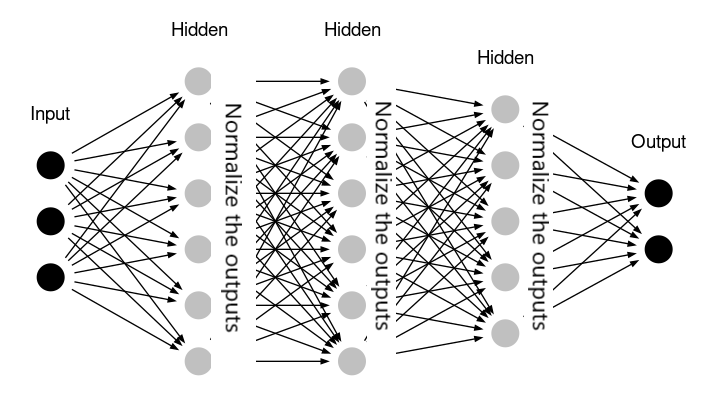

- Batch Normalization is a technique used in neural networks to normalize the input layer by adjusting and scaling the activations. It helps in the faster training of deep neural networks by reducing the internal covariate shift. Internal covariate shift refers to the change in the distribution of layer inputs during the training process due to changes in the parameters of previous layers. This makes it difficult for the network to converge.

- Batch normalization involves normalizing the input of each layer to have zero mean and unit variance, and then scaling and shifting the normalized output using learned parameters. This can be done using the following steps:

    1. Calculate the mean and variance of the input to the current layer over the current batch of training samples.
    2. Normalize the input using the calculated mean and variance.
    3. Scale and shift the normalized output using learned parameters called beta and gamma, respectively.
    4. Pass the scaled and shifted output through a non-linear activation function.


- The benefits of batch normalization are:

    1. It reduces the internal covariate shift, which allows for faster training and better convergence.
    2. It acts as a form of regularization, reducing the risk of overfitting.
    3. It reduces the dependence of the network on the initialization of the parameters, making it more robust to different initializations.
    4. It allows for the use of higher learning rates, which can further speed up the training process.

- Batch normalization can be applied to both fully connected and convolutional layers in neural networks. It is a widely used technique in deep learning, and is often included in modern architectures.






In [22]:

            # calulates the mean and Std at every batch
            # and Scale
        
            # incase of using batch-normalization 
            # keep the batch size reasonably large
            
    

In [21]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(32,
                          activation='relu', 
                          input_shape=(784,)),
    tf.keras.layers.BatchNormalization(),
  
        
    
    tf.keras.layers.Dense(64, 
                          activation='relu', ),
    tf.keras.layers.BatchNormalization(),
    
    
    
    tf.keras.layers.Dense(32, 
                          activation='relu', ),
    tf.keras.layers.BatchNormalization(),
    
    
    
    tf.keras.layers.Dense(10, activation='softmax')
    
])

# Compile the model with appropriate loss and optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with batch normalization
# model.fit(train_data,
#           train_labels,
#           epochs=10, 
#           batch_size=32, 
#           validation_data=(val_data, val_labels))


**In Batch Normalization, alpha and beta are the learned parameters used to scale and shift the normalized output. Specifically:**

- **alpha**: also known as the scaling parameter or the standard deviation, is a learned parameter that scales the normalized output. It is initialized to ones (alpha = 1) and is updated during training.
- **beta**: also known as the shifting parameter or the mean, is a learned parameter that shifts the normalized output. It is initialized to zeros (beta = 0) and is updated during training.

- Together, alpha and beta allow for the normalized output to be rescaled and shifted to any desired range, which can help the network better learn the features of the data.

- During training, both alpha and beta are learned through backpropagation. The gradients are calculated and used to update the parameters during each training step, similar to how the weights in the network are updated.

- In TensorFlow, the tf.keras.layers.BatchNormalization layer automatically initializes alpha and beta to ones and zeros, respectively, and updates them during training. However, these values can also be set manually if desired.

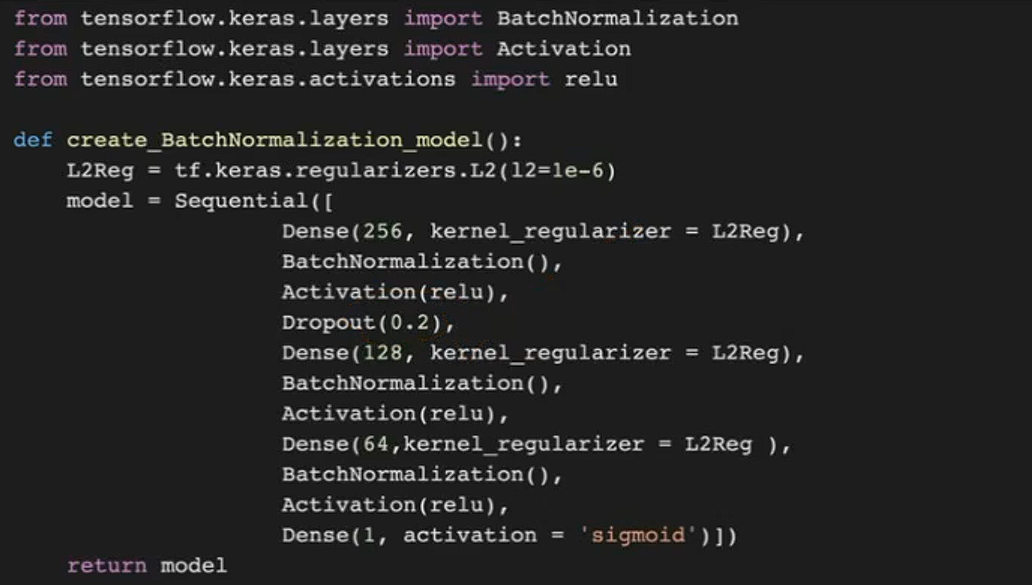

**Purpose of Batch-Normalization**
- converges faster
- better accuracy
- regularisation 


In [31]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import relu
from tensorflow.keras import Sequential

def create_BatchNormalization_model():
    L2Reg = tf.keras.regularizers.L2(l2=1e-6)
    model = Sequential([
                    Dense(256, kernel_regularizer = L2Reg), 
                    BatchNormalization(),
                    Activation(relu),
                    Dropout(0.2),
                    Dense(128, kernel_regularizer = L2Reg), 
                    BatchNormalization(),
                    Activation(relu),
                    Dense(64,kernel_regularizer = L2Reg ),
                    BatchNormalization(),
                    Activation(relu),
                    Dense(1)])
    return model

model = create_BatchNormalization_model() 

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])



In [34]:
# !rm -rf logs
# import time
# from tensorflow.keras.callbacks import TensorBoard

# now = datetime.now()
# log_folder = "tf_logs/.../" + now.strftime("%Y%m%d-%H%M%S") + "/"

# tb_callback = TensorBoard(log_dir=log_folder, histogram_freq=1)


## Early Stopping : 

- the EarlyStopping callback can be used to monitor the validation loss of a neural network during training and stop the training process if the loss stops improving. 
- This can help prevent overfitting and save time and resources by stopping training early if the model has already converged.

In [28]:
import tensorflow as tf

# Load and preprocess data
# train_data, train_labels, val_data, val_labels = ...

# Define the model architecture
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with appropriate loss and optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
# model.fit(train_data, train_labels, epochs=100, batch_size=32,
#           validation_data=(val_data, val_labels), callbacks=[early_stop])


- In this example, the EarlyStopping callback is defined with a monitor parameter set to 'val_loss', which tells the callback to monitor the validation loss during training.


- **The patience parameter is set to 3, which means the training will stop if the validation loss doesn't improve for 3 consecutive epochs.**

- The early_stop callback is then passed to the fit method as a list of callbacks, along with any other desired callbacks.
- During training, the EarlyStopping callback will monitor the validation loss and stop the training process early if the loss stops improving.


- It is worth noting that the EarlyStopping callback can be customized with additional parameters and conditions, such as setting a minimum improvement threshold or monitoring other metrics.
- The patience parameter can also be adjusted to set the number of epochs to wait before stopping training.

# `Case Study : `

You are working at **24Seven**, which has different stores buying various products. Based on the purchase history : 
- you want to divide the stores into classes for better inventory management and customer handling.




In [35]:
df = pd.read_csv('multiclass.csv')

df.head()

<IPython.core.display.Javascript object>

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [36]:
df.shape

(440, 8)

In [38]:
df = pd.get_dummies(df, columns = ['Region'])

#storing class label
Y = df['class']
df = pd.get_dummies(df, columns = ['class'])

df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,0,0,1,0,1,0
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1,0
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1,0
3,13265,1196,4221,6404,507,1788,0,0,1,1,0,0
4,22615,5410,7198,3915,1777,5185,0,0,1,1,0,0


In [39]:
X = df.drop(columns=['class_1','class_2','class_3'])
y = df[['class_1','class_2','class_3']]

In [40]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (356, 9) (356, 3)
Validation: (40, 9) (40, 3)
Test  :  (44, 9) (44, 3)


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [42]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

In [43]:
def create_baseline():
    
    model = Sequential([
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(128, activation="relu",kernel_initializer='glorot_uniform'), 
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'), 
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'), 
                    Dense(3,activation='softmax')])  
    return model

In [44]:
model = create_baseline()

Using ```MiniBatch GD``` as Optimizer 

In [45]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.CategoricalCrossentropy() )


In [46]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128)


Epoch 1/10
3/3 [==============================] - 1s 123ms/step - loss: 1.1249 - val_loss: 1.1186
Epoch 2/10
3/3 [==============================] - 0s 18ms/step - loss: 1.1129 - val_loss: 1.1061
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 1.1017 - val_loss: 1.0942
Epoch 4/10
3/3 [==============================] - 0s 18ms/step - loss: 1.0914 - val_loss: 1.0831
Epoch 5/10
3/3 [==============================] - 0s 17ms/step - loss: 1.0821 - val_loss: 1.0732
Epoch 6/10
3/3 [==============================] - 0s 18ms/step - loss: 1.0737 - val_loss: 1.0644
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 1.0662 - val_loss: 1.0561
Epoch 8/10
3/3 [==============================] - 0s 19ms/step - loss: 1.0591 - val_loss: 1.0486
Epoch 9/10
3/3 [==============================] - 0s 18ms/step - loss: 1.0525 - val_loss: 1.0413
Epoch 10/10
3/3 [==============================] - 0s 23ms/step - loss: 1.0463 - val_loss: 1.0345


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

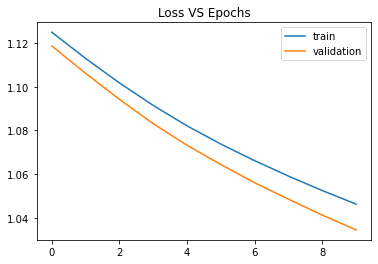

In [47]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()
  


In [48]:
history = model.fit(X_train,
                    y_train, 
                    validation_data = (X_val, y_val), 
                    epochs=200, 
                    batch_size=128,
                    verbose = 0)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

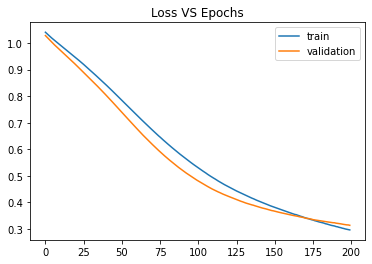

In [49]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()
  


**observe**

The model requires 210 epochs:
- For it to have such a low loss

Now imagine if the dataset has 5 million samples:
- The model will require a very high training epoch 
- in order for it to reach global minima

This surely will be a huge drawback:
- While deploying the model 



## Exponential Moving Average





#### How to reduce the number of epochs during training of the model ?

Ans: By decreasing the number of steps ($V$) optimization algorithm takes to reach global minima.

<br>

#### How to reduce the steps $V$ required for the algorithm to reach global minima ?

If we combine these past steps taken by the optimizer:
-  for it to update the direction of step
- such that it moves towards global minima  



#### Will combining the past steps taken by the optimizer help ?
Ans: Yes, to better understand this lets assume model trained for 3 iterations

Note: 1 iteration = ForwardProp + BackProp

#### What will be the value of $V_1$ ?
Ans: $V_1 = \beta V_0 + (1-\beta) Δ w_1$



#### What will be the value of $V_2$ ?
Ans: $V_2 = \beta V_1 + (1-\beta) Δ w_2$

- $V_2 =\beta^2 V_0 + \beta(1-\beta)Δ w_1+ (1-\beta) Δ w_2 $


#### What will be value of $V_3$ ?

Ans: $V_3 = \beta V_2 + (1-\beta) Δ w_3$

- $V_3 =\beta^3 V_0 + \beta^2(1-\beta)Δ w_1+ \beta(1-\beta) Δ w_2 + (1-\beta) Δ w_3  $



Thus using **Exponential Moving Average**, the optimizer 
- updates its direction according to its previous step taken.
- And smoothes out its current direction 
- in order to reach global minima faster

## Graident Descent with Momentum

#### How does Gradient Descent implement Exponential Moving Average ?

Ans: for some iteration t and layer $k$ of the NN :
- after finding $dw^k$ and $db^k$,

the exopnential moving average is introduced:
- $V_{dw^k} = β \times V_{dw^k} + (1-β) \times dw^k $

Similarly:

- $V_{db^k} = β \times V_{db^k} + (1-β) \times db^k $

Hence Weight updation with learning rate $α$ becomes:
- $w^k = w^k -\alpha \times V_{dw^k}$

- $b^k = b^k -\alpha \times V_{db^k}$

<br>

**Note:** This approach can be analogous to a ball moving down a hill where:

- the gradients $dw^k $ and $db^k$ acts as acceleration
- the $V_{dw}$ and $V_{db}$ acts as velocity with which the ball is moving
- And the term $β$ acts as friction and helps prevent the ball from speeding up without limit

Hence we can say, as the ball rolls down, it gains **momentum**
- therefore this approach is called **Gradient Descent with Momentum**












<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

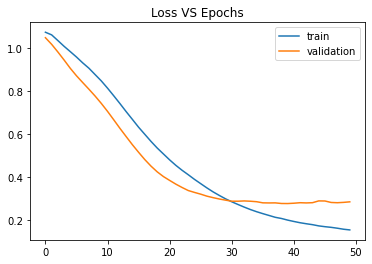

In [50]:
model_gdm = create_baseline()

model_gdm.compile(optimizer = tf.keras.optimizers.SGD(momentum=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy() )

history = model_gdm.fit(X_train,
                        y_train, 
                        validation_data = (X_val, y_val),
                        epochs=50, 
                        batch_size=128, 
                        verbose = 0)

epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()
  


**Observe**

Just by using Momentum with Gradient Descent:
- The model was able to perform so much better in just 25 epochs



## RMSprop


#### Is there a way to reduce the training epoch for the model ?

Ans: Yes, as we know : 
- optimizer tends to move in direction (osciallations) when gradient of weight is greater than the other
- Meaning $ Δb >>> Δw $

Hence to reduce this moving direction, lets say:

On some iteration t, we calculate $V_{dw} $ by squaring the gradients as:
- $V_{dw^k} = \beta V_{dw^k} + (1-β) (dw^k)^2 $
- $V_{db^k} = \beta V_{db^k} + (1-β) (db^k)^2 $


#### How is squaring useful ?
Ans: as gradients in which the optimizer moves is higher then:
- the square of the gradient will be much high
- thus making $V_{db^k} > V_{dw^k}$ 

<br>

Now during weight updation:

- $w^k = w^k - α \times \frac{dw^k}{\sqrt{V_{dw^k}+ ϵ} } $; where $ϵ$ is a very small value  $ = 10^{-8}$ 
- $b^k = b^k - α \times \frac{db^k}{\sqrt{V_{db^k}+ ϵ} } $

<br>

Since $V_{db^k} > V_{dw^k}$, 
- meaning $\frac{1}{V_{dw^k}} > \frac{1}{V_{db^k}} $

Thus making the  optimizer to move more in the direction of $dw^k$:
- hence decreasing  osciallations of the optimizer

<br>

#### Why is epilson $ϵ$ added ?
Ans: To prevent the denominator to become 0:
- When $V_{dw}$ or $V_{db}$ is 0 

<br>

**Note:** This approach is known as **RMSprop**





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

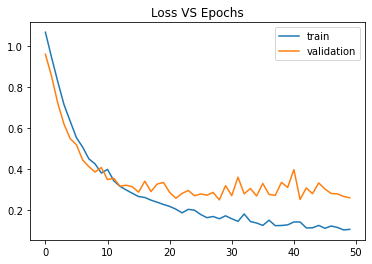

In [51]:
model_rms = create_baseline()

model_rms.compile(optimizer = tf.keras.optimizers.RMSprop(rho=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy() )


history = model_rms.fit(X_train,
                        y_train,
                        validation_data = (X_val, y_val),
                        epochs=50,
                        batch_size=128, 
                        verbose = 0)


epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()
  


**Observe**

Though RMSProp reaches minima within 10 training epochs:
- we see a lot of oscillations than Gradient Descent with momentum
- meaning the optimizer still takes steps in the direction not to the global minima


## Adam

#### is there a way to reduce these oscillations while still keeping the training epochs low ?

Ans: if we combine both RMSprop and momentum, this is done by an alogrithm called **Adam**

<br>

#### How does Adam work ?

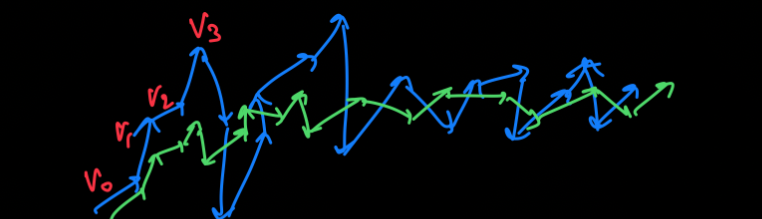


Ans: Now for simplicity:
- Lets call RMSprop $V_{dw}, V_{db}$ as $S_{dw}, S_{db}$

Therefore now for some iteration t:
- We compute $dW$, $db$

then for Momentum we can say:

- $V_{dw^k} = \beta_1 V_{dw^k} + (1-\beta_1) dw^k $

Similarly,
- $V_{db^k} = \beta_1 V_{db^k} + (1-\beta_1) db^k $

<br>


After performing momentum ,RMSprop is calculated as:
- $S_{dw^k} = \beta_2 S_{dw^k} + (1-\beta_2) (dw^k)^2 $

Similarly
- $S_{db^k} = \beta_2 S_{db^k} + (1-\beta_2) (db^k)^2 $

<br>

As momentum and RMSprop both averages out,  the steps taken by Optimizer,
- then for step:$V_3$, the average out value is more influenced by $V_0, V_1, V_2$ 
- which makes the average value of $V_3$ biased and far away from the actual $V_3$

<br>





#### How to prevent this biasness ?
Ans: it is done by dividing $V_{dw^k}$, $V_{db^k}$ by:
- $V^{corrected}_{dw^k} = \frac{V_{dw^k}}{1-β_1^t}$

Similarly:
- $V^{corrected}_{db^k} = \frac{V_{db^k}}{1-β_1^t}$

and for RMSprop:

- $S^{corrected}_{dw^k} = \frac{S_{dw^k}}{1-β_2^t}$

Similarly:
- $S^{corrected}_{db^k} = \frac{S_{db^k}}{1-β_2^t}$

**Note:** this process is called as **Bias Correction**


<br>

Now finally, weights updation is performed:

- $w^k = w^k - α \times  \frac{1}{\sqrt{S^{corrected}_{dw}+ ϵ}} \times V^{corrected}_{dw}$

- $b^k = b^k - α \times  \frac{1}{\sqrt{S^{corrected}_{db}+ ϵ}} \times V^{corrected}_{db}$






 
 
 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

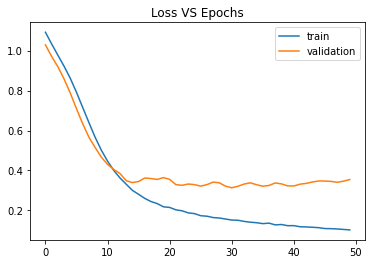

In [52]:
model_adam = create_baseline()


model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, 
                                                        beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy() )


history = model_adam.fit(X_train,
                         y_train,
                         validation_data = (X_val, y_val),
                         epochs=50, 
                         batch_size=128, 
                         verbose = 0)


epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()
  


#### Learning Rate Decay

**Observe**

How using Adam algorithm,
- the oscillations are reduced drastically
- also the model takes almost 12 epochs for it to show accruate results
- But the model performance on the validation is still high 

<br>

#### Is there a way to improve model performance  ?

Ans: recall how optimizer tends on moving around the global minima:
- if the learning rate is high 

#### Will a learning rate of 0.01 high for our problem ?
Ans: As using different Optimizers, 
- The validation loss moves around 0.4
- it means the optimizer is stuck around the global minima


#### But what happens if learning rate is smaller ?
Ans: The number of steps increases 
- And the model will require more epochs to reach global minima 

<br>

#### How to make optimizer take small number of steps and still reach global minima ?

Ans: what if we keep a high learning rate intially ($\alpha_0$) 
- and Learning rate decreases with each epoch($e$) by a rate $r_0$

This is called as Learning rate decay, defined as:
- for epoch in epochs: 
- $\alpha = \frac{1}{1 + r_0 \times epoch } \times \alpha_0 $
- $\alpha_0 = \alpha $

<br>

#### When to implement Learning rate decay, should it be done before or after an epoch ?
Ans: After an epoch by using:
- Tensorflow callback 

<br>

Lets now implement Learning Rate decay using [LearningRateScheduler](https://keras.io/api/callbacks/learning_rate_scheduler/)



In [58]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    r_0 = 0.01
    lr = (1/(1+r_0*epoch))*lr 

    return lr

In [59]:
LRdecay = LearningRateScheduler(scheduler)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

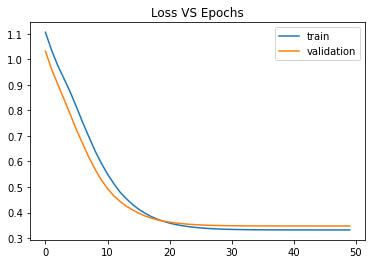

In [60]:
model_adam = create_baseline()

model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9,
                                                        beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy() )


history = model_adam.fit(X_train, 
                         y_train,
                         validation_data = (X_val, y_val), 
                         epochs=50,
                         batch_size=128,
                         callbacks=[LRdecay],
                         verbose = 0)

epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()
  


**observe**

How by using Learning Rate decay, 
- the model reaches a loss of around 0.3 now
- Showing that reducing the Learning Rate did help improve model performance




# Simulation for Momentum, RMSprop and Adam

![Screenshot.gif](https://drive.google.com/uc?export=view&id=1_J2HkcVeVSn08yXQ_Zr-ozltJVrziCQ2)

[Visualization software](https://github.com/lilipads/gradient_descent_viz) for simulation purpose
- **Works locally** 

**observe**

- How momentum quickly reaches minima due to the exponential moving average


Also Adam takes a few iteration before reaching minima

- Showing how it uses both the RMSprop and Momentum in order to find the global minima

